In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hazm
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
train_df = pd.read_csv('train.csv', delimiter='\t', on_bad_lines='skip', index_col=[0])
test_df = pd.read_csv('test.csv', delimiter='\t', on_bad_lines='skip', index_col=[0])

train_df.head()

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


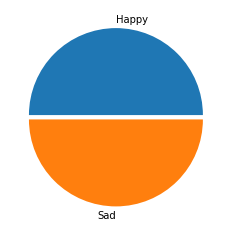

In [3]:
labels = ['Happy', 'Sad']
sizes = list(train_df['label_id'].value_counts())

plt.pie(sizes, labels = labels, explode=[0, 0.05])

plt.show()

In [4]:
normalizer = hazm.Normalizer()
stopwords = hazm.stopwords_list()
punctuations = string.punctuation + "٬" + "،"

def clean_text(text):
    translator = str.maketrans('', '', punctuations)
    normalized_text = normalizer.normalize(text)
    cleaned_text = [word.translate(translator) for word in hazm.word_tokenize(normalized_text) if word not in stopwords]

    return ' '.join(cleaned_text)

In [5]:
train_df['comment'] = train_df['comment'].apply(clean_text)
test_df['comment'] = test_df['comment'].apply(clean_text)

In [6]:
X_train, X_test, y_train, y_test = train_df['comment'], test_df['comment'], train_df['label_id'], test_df['label_id']

In [7]:
tfidf = TfidfVectorizer(use_idf=True, max_features=256, min_df=2)

X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [8]:
model = RandomForestClassifier(n_estimators=25)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3500
           1       0.78      0.82      0.80      3500

    accuracy                           0.79      7000
   macro avg       0.79      0.79      0.79      7000
weighted avg       0.79      0.79      0.79      7000



In [9]:
y_pred_train = model.predict(X_train)

In [10]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     28350
           1       0.96      0.95      0.96     28350

    accuracy                           0.96     56700
   macro avg       0.96      0.96      0.96     56700
weighted avg       0.96      0.96      0.96     56700



In [11]:
import joblib

joblib.dump(tfidf, '../tf_idf.pkl')
joblib.dump(model, '../cm_classifier.pkl')

['../cm_classifier.pkl']

In [12]:
classifier = joblib.load('../cm_classifier.pkl')
tfidf = joblib.load('../tf_idf.pkl')

input = 'غذا بد بود'
test_message = tfidf.transform([input]).toarray()
print(input, classifier.predict(test_message)[0])

غذا بد بود 1
